## Урок 1. Алгоритм линейной регрессии. Градиентный спуск

In [2]:
import numpy as np
import matplotlib.pyplot as plt

__Задача:__ предсказание баллов ЕГЭ ученика в зависимости от кол-ва лет стажа его репетитора

In [3]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2]])
X

array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  2,  5,  3,  0,  5, 10,  1,  2]])

In [4]:
X.shape

(2, 10)

In [5]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

Уравнение прямой: $y = a*x + b$

In [6]:
y_pred1 = 35 * np.ones(10) + X[1]*5
y_pred2 = 40 * np.ones(10) + X[1]*7.5

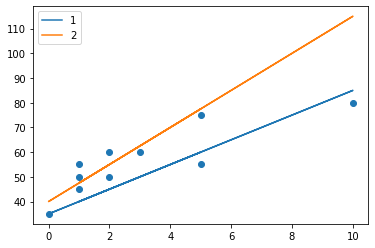

In [8]:
plt.scatter(X[1], y)
plt.plot(X[1], y_pred1, label='1')
plt.plot(X[1], y_pred2, label='2')
plt.legend()
plt.show()

Простая ошибка

In [9]:
err1 = np.sum(y - y_pred1)
err2 = np.sum(y - y_pred2)
err1, err2

(65.0, -60.0)

MAE (Mean Absolute Error)

In [10]:
mae_1 = np.sum(np.abs(y - y_pred1)) / 10
mae_2 = np.sum(np.abs(y - y_pred2)) / 10
mae_1, mae_2

(8.5, 9.0)

MSE (Mean Squared Error)

In [11]:
mse_1 = np.mean((y - y_pred1)**2)
mse_2 = np.mean((y - y_pred2)**2)
mse_1, mse_2

(97.5, 188.75)

Метод наименьших квадратов (МНК)

In [12]:
X.shape

(2, 10)

In [13]:
X.T.shape

(10, 2)

In [14]:
all(X @ y == np.dot(X,y))

True

In [15]:
W = np.linalg.inv(np.dot(X, X.T)) @ X @ y
W

array([45.0625,  3.8125])

In [16]:
y_pred3 = W[0] * X[0] + W[1] * X[1]

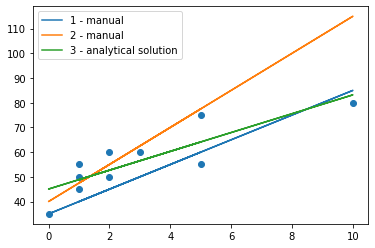

In [17]:
plt.scatter(X[1], y)
plt.plot(X[1], y_pred1, label='1 - manual')
plt.plot(X[1], y_pred2, label='2 - manual')
plt.plot(X[1], y_pred3, label='3 - analytical solution')
plt.legend()
plt.show()

In [18]:
def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2) # <=> 1/n * np.sum((y_pred - y)**2)
    return err

In [19]:
calc_mae(y, y_pred1), calc_mse(y, y_pred1)

(8.5, 97.5)

In [20]:
calc_mae(y, y_pred2), calc_mse(y, y_pred2)

(9.0, 188.75)

In [21]:
calc_mae(y, y_pred3), calc_mse(y, y_pred3)

(5.7875, 43.96875)

Градиентный спуск

In [22]:
n = 10
Q = 1/n * np.sum((y_pred3 - y)**2) # функционал ошибки, y = X*w

In [23]:
alpha = 1e-2 # величина шага
g = alpha * (1/n * 2 * np.sum(X[0] * (W[0] * X[0] - y)))

In [24]:
W[0], W[0] - g

(45.0625, 45.29125)

### Д/З

1. Подберите скорость обучения (alpha) и количество итераций

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

alpha = 0.012987012987012986, Iteration #0: W_new = [2.08 4.27], MSE = 3047.75
alpha = 0.016866250632484397, Iteration #10: W_new = [ 8.04836075 10.5076949 ], MSE = 704.72
alpha = 0.021904221600629086, Iteration #20: W_new = [13.3659982   9.56016975], MSE = 532.06
alpha = 0.028447041039778034, Iteration #30: W_new = [19.15793593  8.50989329], MSE = 373.04
alpha = 0.03694420914256887, Iteration #40: W_new = [25.14577953  7.42409018], MSE = 240.88
alpha = 0.047979492392946584, Iteration #50: W_new = [30.92509191  6.37610098], MSE = 144.78
alpha = 0.062311029081748806, Iteration #60: W_new = [36.02490725  5.4513281 ], MSE = 86.04
alpha = 0.08092341439188157, Iteration #70: W_new = [40.02789407  4.72544816], MSE = 57.39
alpha = 0.10509534336607995, Iteration #80: W_new = [42.72363049  4.23661792], MSE = 46.97
alpha = 0.13648745891698694, Iteration #90: W_new = [44.20855622  3.96734946], MSE = 44.39
al

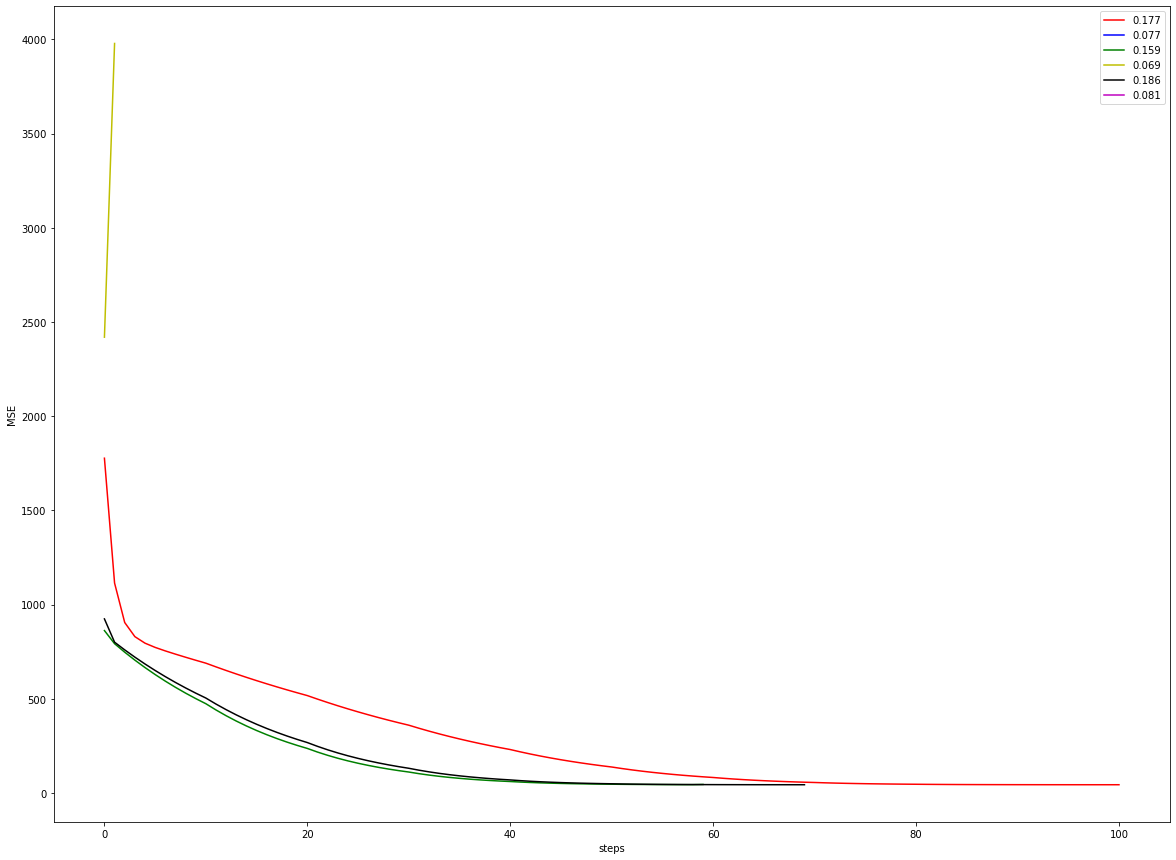

In [85]:
alpha = 1e-02
err_list = [100000,10000]

import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
plt.ylabel('MSE')
plt.xlabel('steps')

for j in ['r','b','g','y','k','m']:
    step=[]
    
    n = X.shape[1]
    
    W = np.array([1, 0.5])
    print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')

    for i in range(150):
        
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        err_list.append(err)
        for k in range(len(W)):
            W[k] -= alpha * (1/n * 2 * np.sum(X[k] * (y_pred - y)))
        if i % 10 == 0:
            alpha /= 0.77
            print(f'alpha = {alpha}, Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')
        if err_list[-1] > err_list[-2]:
            break
        step.append(i)    
    
    plt.plot(step,err_list[-len(step):],color=j,label=str(round(alpha,3)))
   
   
    
    
    
    alpha = alpha / 3
    err_list = [100000,10000]
plt.legend()
plt.show()    

In [ ]:
При шаге обучения 0.16 и 0.18 наш градиентный спуск дает наименьшую ошибку на всех шагах обучения и плавное снижение. 
Скорее всего, оптимальный шаг будет близок к этим зачениям.

*2. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее

In [78]:
n = X.shape[1]
alpha = 5e-2
W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')

for i in range(800):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    #for k in range(W.shape[0]):
    #     W[k] -= alpha * (1/n * 2 * np.sum(X[k] * (y_pred - y)))
    W -= alpha * (1/n * 2 * np.dot(X, (y_pred - y)))
    W_pred = W
    
    if i % 10 == 0:
        
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.05        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [ 6.4  19.35], MSE = 3047.75
Iteration #10: W_new = [19.96966932  8.87179137], MSE = 379.6
Iteration #20: W_new = [29.27719328  6.70531799], MSE = 172.93
Iteration #30: W_new = [35.16120834  5.60976141], MSE = 94.66
Iteration #40: W_new = [38.85365942  4.93848587], MSE = 63.9
Iteration #50: W_new = [41.16920131  4.51849616], MSE = 51.81
Iteration #60: W_new = [42.62118483  4.25519525], MSE = 47.05
Iteration #70: W_new = [43.53165976  4.0900943 ], MSE = 45.18
Iteration #80: W_new = [44.10257814  3.98656703], MSE = 44.45
Iteration #90: W_new = [44.46057568  3.9216497 ], MSE = 44.16
Iteration #100: W_new = [44.68506002  3.88094292], MSE = 44.04
Iteration #110: W_new = [44.82582417  3.85541751], MSE = 44.0
Iteration #120: W_new = [44.91409111  3.83941166], MSE = 43.98
Iteration #130: W_new = [44.96943938  3.82937511], MSE = 43.97
Iteration #140: W_new = [45.00414582  3.82308163],

*3. Вместо того, чтобы задавать количество итераций, задайте условие остановки алгоритма - когда ошибка за итерацию начинает изменяться ниже определенного порога (упрощенный аналог параметра tol в линейной регрессии в sklearn).

In [79]:
delta_err = 0.00001
err_list = [10000,1000]
n = X.shape[1]
alpha = 1e-2
W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')

for i in range(900):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    #for k in range(W.shape[0]):
    #     W[k] -= alpha * (1/n * 2 * np.sum(X[k] * (y_pred - y)))
    W -= alpha * 2 * np.dot(X, (y_pred - y))/n
  
    err_list.append(err)
    if abs(err_list[-1] - err_list[-2]) < delta_err:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')
        break
    W_pred = W
    
    #if i % 10 == 0:
        
        #print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #778: W_new = [45.02904272  3.81856696], MSE = 43.97


4. Сделайте выводы по результатам работы с GD : что повышает качество результата, что понижает.

In [ ]:
Вывод:
    
-Плавное изменение шага обучения и его минимальный размер (вообще, та логика, по которой  мы изменяем шаг) учеличивает точность измерения
-Точное указание минимального изменения ошибки позволяет быстрее закончить процесс.

Понижает качество обучения  неправильно подобранный шаг, неправильно выбранная начальная точка размера ошибки может увеличить время вычисления, 
отсутсвие стоп-значений для окончания обучения также увеличивает время обучения.

Градиентный спуск очень дорог в издержках для больших выборок, но зато находится глобальное оптимальное решение.

ДЗ1 Lesson_1_HW

1. Подберите скорость обучения (alpha) и количество итераций

*2. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее

*3. Вместо того, чтобы задавать количество итераций, задайте условие остановки алгоритма - когда ошибка за итерацию начинает изменяться ниже определенного порога (упрощенный аналог параметра tol в линейной регрессии в sklearn).

4. Сделайте выводы по результатам работы с GD : что повышает качество результата, что понижает.